![](logo.png)
# Day Objectives

## Random Forest
- It can be used for both Classification and Regression problems in ML.
- It is based on the concept of ensemble learning
- Which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.
- Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset
- Takes the average to improve the predictive accuracy of that dataset.
- The random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output.
- **The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting.**

### Why use Random Forest?
- It takes less training time as compared to other algorithms.
- It predicts output with high accuracy, even for the large dataset it runs efficiently.
- It can also maintain accuracy when a large proportion of data is missing.


![](tree.png)


### Advantages of Random Forest
- Random Forest is capable of performing both Classification and Regression tasks.
- It is capable of handling large datasets with high dimensionality.
- It enhances the accuracy of the model and prevents the overfitting issue.

[WineData.csv](https://raw.githubusercontent.com/LavanyaPolamarasetty/Datasets/master/Classification/wine.data.csv)
[Salary.csv](https://raw.githubusercontent.com/LavanyaPolamarasetty/Datasets/master/Regression/Salary_Data.csv)

In [1]:
import pandas as pd
import numpy as np

In [2]:
wine = pd.read_csv("https://raw.githubusercontent.com/LavanyaPolamarasetty/Datasets/master/Classification/wine.data.csv")
wine.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
wine.shape

(178, 14)

In [4]:
wine["Class"].value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

In [7]:
X = wine[wine.columns[1:]]
X.head(3)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


In [8]:
y = wine["Class"]

In [9]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.75)

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rcls = RandomForestClassifier(n_estimators=3,max_depth=4)

In [28]:
rcls.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, n_estimators=3)

In [29]:
predictedValues = rcls.predict(X_test)
predictedValues

array([3, 2, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 2, 1, 3, 2, 3, 3, 1, 3, 1, 2,
       3, 2, 1, 2, 1, 1, 2, 3, 2, 1, 2, 2, 1, 2, 1, 2, 2, 3, 2, 2, 1, 1,
       1], dtype=int64)

In [30]:
y_test

171    3
96     2
174    3
22     1
175    3
92     2
60     2
36     1
166    3
43     1
177    3
9      1
128    2
48     1
134    3
85     2
135    3
83     2
1      1
144    3
20     1
86     2
146    3
63     2
45     1
97     2
123    2
121    2
100    2
156    3
105    2
26     1
113    2
111    2
7      1
68     2
143    3
115    2
114    2
145    3
82     2
72     2
41     1
55     1
52     1
Name: Class, dtype: int64

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [32]:
accuracy_score(y_test,predictedValues)*100

88.88888888888889

In [33]:
confusion_matrix(y_test,predictedValues)

array([[13,  0,  0],
       [ 2, 16,  2],
       [ 1,  0, 11]], dtype=int64)

In [34]:
y_test.shape

(45,)

In [35]:
len(rcls.estimators_) # 100 decision tree 

3

In [37]:
rcls.estimators_[0]

DecisionTreeClassifier(max_depth=4, max_features='auto',
                       random_state=1515970957)

In [38]:
import matplotlib.pyplot as plt

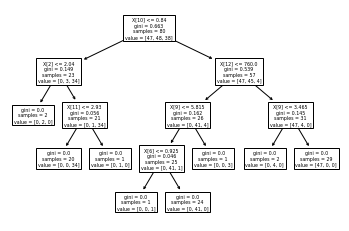

In [39]:
# single decision tree from random forest
from sklearn import tree
tree.plot_tree(rcls.estimators_[0])
plt.show()

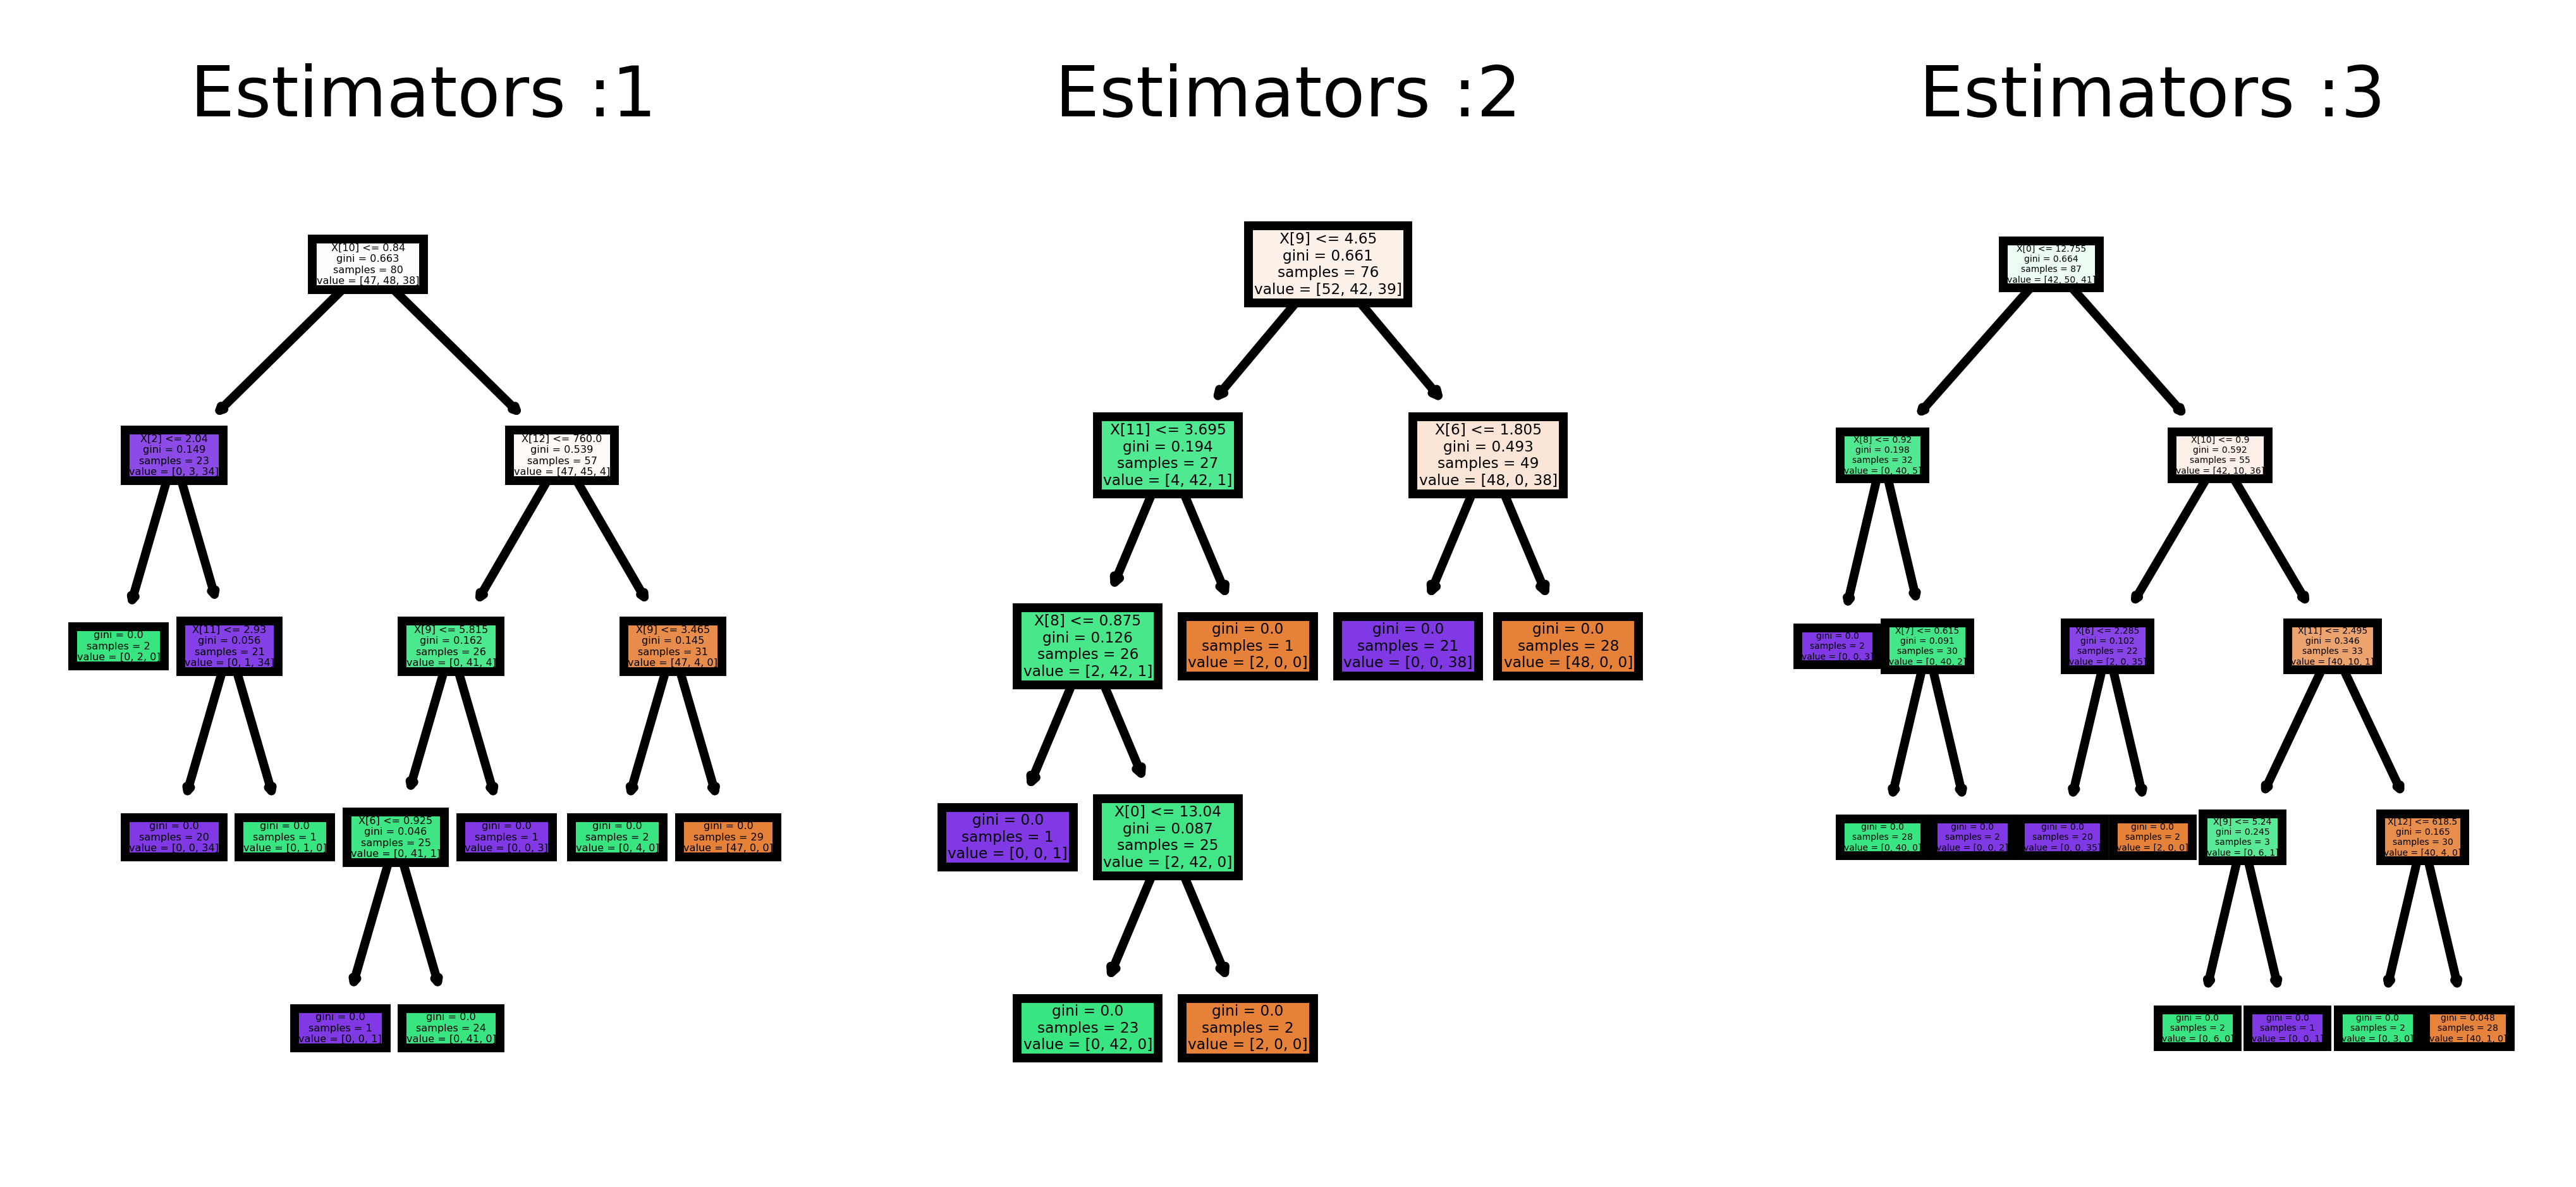

In [43]:
fig,axis = plt.subplots(nrows = 1, ncols = 3, figsize = (5,2), dpi = 1000)
for index in range(3):
    tree.plot_tree(rcls.estimators_[index],
                  ax = axis[index],
                  filled = True)
    axis[index].set_title("Estimators :"+str(index+1), fontsize = 8)